In [34]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the online link
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
data = pd.read_csv(url, delim_whitespace=True, names=column_names)




C:\Users\awasthi\AppData\Local\Temp\ipykernel_23444\1259455860.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=column_names)


# EDA

Step 1: Data Exploration

In [20]:

#Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Data types and missing values
print(data.info())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

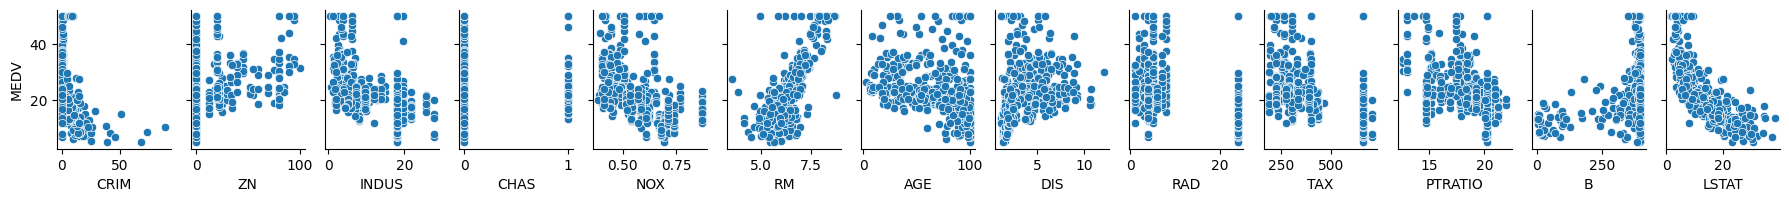

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


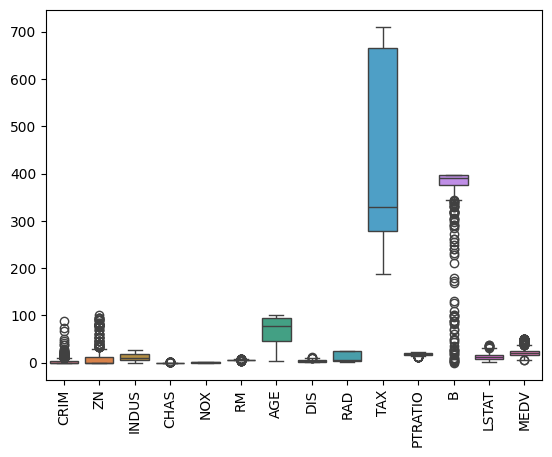

In [22]:

# Visualize relationships between features and the target variable
sns.pairplot(data, x_vars=column_names[:-1], y_vars='MEDV', height=2, aspect=0.7)
plt.show()

# Identify missing values and outliers
print(data.isnull().sum())
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

Step 2: Data Preprocessing

In [23]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Handle missing values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
data_imputed['CHAS'] = data_imputed['CHAS'].astype('category')

# Normalize/standardize numerical features
scaler = StandardScaler()
data_imputed[column_names[:-1]] = scaler.fit_transform(data_imputed[column_names[:-1]])

# Split the data into training and testing sets
X = data_imputed.drop('MEDV', axis=1)
y = data_imputed['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(404, 13) (102, 13) (404,) (102,)


Step 3: Model Building and Training

In [27]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load preprocessed data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
X_train, X_test, y_train, y_test = preprocess_data(url)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse}, Test MSE: {test_mse}')


C:\Users\awasthi\AppData\Local\Temp\ipykernel_23444\765525526.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=column_names)


Train MSE: 21.641412753226316, Test MSE: 24.291119474973517


Step 4: Model Evaluation


In [36]:

# Function to preprocess data
def preprocess_data(url):
    column_names = [
        "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
        "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
    ]
    data = pd.read_csv(url, delim_whitespace=True, names=column_names)
    
    imputer = SimpleImputer(strategy='median')
    data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    
    data_imputed['CHAS'] = data_imputed['CHAS'].astype('category')
    
    scaler = StandardScaler()
    data_imputed[column_names[:-1]] = scaler.fit_transform(data_imputed[column_names[:-1]])
    
    X = data_imputed.drop('MEDV', axis=1)
    y = data_imputed['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

# Function to train model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Load preprocessed data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
X_train, X_test, y_train, y_test = preprocess_data(url)

# Train the model
model = train_model(X_train, y_train)

# Predict on the testing data
y_test_pred = model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Test MSE: {test_mse}, R-squared: {r2}')



C:\Users\awasthi\AppData\Local\Temp\ipykernel_23444\367684286.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=column_names)


Test MSE: 24.291119474973517, R-squared: 0.668759493535632


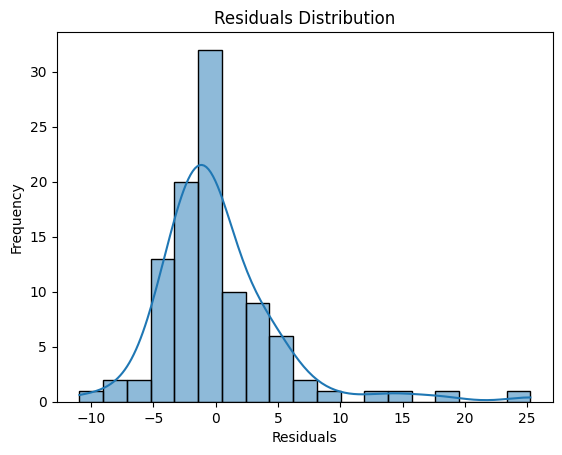

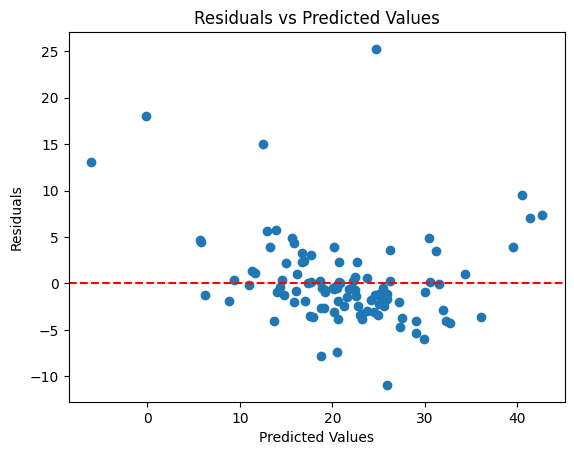

In [37]:
# Plot residuals
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Step 5: Feature Engineering and Improvement

C:\Users\awasthi\AppData\Local\Temp\ipykernel_23444\794897259.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=column_names)


Test MSE with new features: 16.44806056869648, R-squared with new features: 0.775709640770372
Test MSE with original features: 27.11495741558058, R-squared with original features: 0.6302528487272827


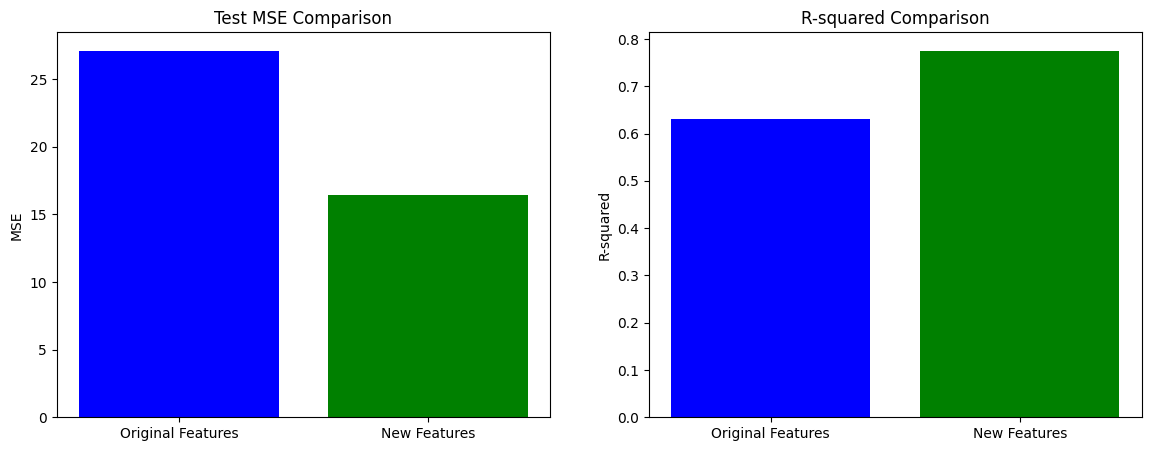

In [39]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
data = pd.read_csv(url, delim_whitespace=True, names=column_names)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

scaler = StandardScaler()
data_imputed[['RM', 'LSTAT', 'PTRATIO']] = scaler.fit_transform(data_imputed[['RM', 'LSTAT', 'PTRATIO']])

# Create new features
data_imputed['RM_LSTAT'] = data_imputed['RM'] * data_imputed['LSTAT']
data_imputed['PTRATIO_LSTAT'] = data_imputed['PTRATIO'] * data_imputed['LSTAT']

# Standardize the new features
scaler = StandardScaler()
data_imputed[['RM_LSTAT', 'PTRATIO_LSTAT']] = scaler.fit_transform(data_imputed[['RM_LSTAT', 'PTRATIO_LSTAT']])

# Split the data into training and testing sets with new features
X_new = data_imputed.drop('MEDV', axis=1)
y_new = data_imputed['MEDV']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train a linear regression model with new features
model_new = LinearRegression()
model_new.fit(X_train_new, y_train_new)

# Predict on the testing data with new features
y_test_pred_new = model_new.predict(X_test_new)

# Evaluate the model with new features
test_mse_new = mean_squared_error(y_test_new, y_test_pred_new)
r2_new = r2_score(y_test_new, y_test_pred_new)

print(f'Test MSE with new features: {test_mse_new}, R-squared with new features: {r2_new}')

# Compare with the original model
# Train the original model again for comparison
X = data_imputed[['RM', 'LSTAT', 'PTRATIO']]
y = data_imputed['MEDV']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)
model_orig = LinearRegression()
model_orig.fit(X_train_orig, y_train_orig)
y_test_pred_orig = model_orig.predict(X_test_orig)
test_mse_orig = mean_squared_error(y_test_orig, y_test_pred_orig)
r2_orig = r2_score(y_test_orig, y_test_pred_orig)

print(f'Test MSE with original features: {test_mse_orig}, R-squared with original features: {r2_orig}')

# Plot comparison
labels = ['Original Features', 'New Features']
mse_values = [test_mse_orig, test_mse_new]
r2_values = [r2_orig, r2_new]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].bar(labels, mse_values, color=['blue', 'green'])
ax[0].set_title('Test MSE Comparison')
ax[0].set_ylabel('MSE')

ax[1].bar(labels, r2_values, color=['blue', 'green'])
ax[1].set_title('R-squared Comparison')
ax[1].set_ylabel('R-squared')

plt.show()
